# 載入相關套件

In [34]:
# -- 常用套件 -- #
import pandas as pd
import numpy as np

# -- 機器學習相關套件 -- #

# 一、資料預處理
from sklearn.preprocessing import StandardScaler # Z-Score
from sklearn.preprocessing import MinMaxScaler # 極值正規化
from sklearn.preprocessing import Normalizer 

# 二、資料切分(學習資料 & 測試資料)
from sklearn.model_selection import train_test_split # 切分資料
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score # 交互驗證-超參數調優

# 三、機器學習相關明件 ML演算法
from sklearn.linear_model import LogisticRegression   # 邏輯迴歸
from sklearn.tree import DecisionTreeClassifier       # 決策樹
from sklearn.ensemble import RandomForestClassifier   # 隨機森林
from sklearn.svm import SVC                           # SVM 支援向量機
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn.neural_network import MLPClassifier      # NN 神經網路
from sklearn.naive_bayes import GaussianNB            # 天真貝氏

# 四、模型評估
from sklearn.metrics import confusion_matrix # 混淆矩陣
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score # 績效指標
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC, AUC相關

# iris資料集

In [2]:
# 資料讀取
iris = pd.read_csv('C:/Users/hsu/Desktop/data/iris.csv',    # 路徑
                   sep = ',',                               # 逗號分隔
                   encoding = 'utf-8',                      # 編碼
                   engine = 'python')                       # 使用工具
df = iris.copy()

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 資料處理-篩出特徵與目標變數
X = df.iloc[:,0:4] # 特徵變數
y = df.iloc[:,-1] # 目標變數

# 資料處理-標準化(此處用 Z-Score)
st = StandardScaler()
X_s = st.fit_transform(X) 
df_SX = pd.DataFrame(X_s, columns=X.columns)
df_SX.head()

# 補充：不同寫法
# StandardScaler().fit_transform(X)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# 劃分訓練資料集 和 測試資料集
X_train, X_test, y_train, y_test = train_test_split(df_SX,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)


# 重要參數說明：stratify
# stratify是為了保持split前類的分布。比如有100個數據，80個屬於A類，20個屬於B類。
# 如果train_test_split(… test_size=0.25, stratify = y_all), 那麼split之後數據如下：
# training: 75個數據，其中60個屬於A類，15個屬於B類。
# testing: 25個數據，其中20個屬於A類，5個屬於B類。

In [6]:
# 建立模型
lrclf = LogisticRegression()
lrclf.fit(X_train, y_train)

LogisticRegression()

In [7]:
# 預測
lrclf_pred = lrclf.predict(X_test)           # 分出 0, 1, 2 對應 Species
lrclf_predpro = lrclf.predict_proba(X_test)  # 分出 0, 1, 2 的可能機率

In [82]:
## -- 績效指標 -- ##

# 混淆矩陣
print('Confusion Matrix\n',confusion_matrix(y_test, lrclf_pred))

# ACC, F1, Record Call, Precision
print('Accuracy = {}'.format(accuracy_score(y_test, lrclf_pred)))
print('F1-Score = {}'.format(f1_score(y_test, lrclf_pred, average='macro')))
print('ReCall = {}'.format(recall_score(y_test, lrclf_pred, average='macro')))
print('Precision = {}'.format(precision_score(y_test, lrclf_pred, average = 'macro')))

# 如果目標變數為三類以上(含)，需調整參數 "average = 'macro' "

Confusion Matrix
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
Accuracy = 0.9666666666666667
F1-Score = 0.9584859584859583
ReCall = 0.9696969696969697
Precision = 0.9523809523809524


In [69]:
# 存出模型
import pickle # 載入套件
with open('C:/Users/hsu/Desktop/data/lr_model.pkl', mode='wb') as m:
    pickle.dump(obj=lrclf, file=m)

In [70]:
# 讀取模型
with open('C:/Users/hsu/Desktop/data/lr_model.pkl', mode = 'rb') as lm:
    model = pickle.load(file=lm)

In [81]:
# 模型運用
model.predict([[1,2,3,4]]) # 單筆資料預測

model.predict([[2,3,4,5],
               [3,4,5,7],
               [5,6,7,8],
               [8,9,8,7],
               [10,8,5,20]]) # 多筆資料預測

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [ ]:
 ## 上述為 ML 基礎流程 ##

In [ ]:
## 其它運用 ##

In [65]:
# 先將 y_test 的亂數 index 調整(此舉為了日後合併時，index不出錯)
tag = pd.DataFrame(y_test)
tag.index = pd.Series(range(0,30))
tag.head() # 新目標變數的 index 有順序

,Species
0,versicolor
1,virginica
2,virginica
3,versicolor
4,setosa


In [68]:
pd.concat([pd.DataFrame(lrclf_predpro), tag], axis = 1).head()
# 0, 1, 2 對應 setosa, versicolor, virginica
# 可看機率看出那一類型

,0,1,2,Species
0,0.001038,0.563260,4.357011e-01,versicolor
1,0.000081,0.080388,9.195314e-01,virginica
2,0.000034,0.036082,9.638842e-01,virginica
3,0.080384,0.874408,4.520789e-02,versicolor
4,0.990891,0.009109,2.574244e-08,setosa


In [94]:
# GridSearchCV

clflr = LogisticRegression()                         # 建立 ML 分類器
parameters = {'penalty':['l1','l2']}                 # 針對此 ML 參數進行設定，運用字典及串列編寫參數

grid_search = GridSearchCV(estimator = clflr,        # 將行3設定的分類器，放入此參數
                           param_grid = parameters,  # 將參數表放入網格中
                           cv = 10,                  # 交互驗證次數設定 
                           scoring = 'accuracy')     # 輸出欲了解的績效指標

optipar = grid_search.fit(X_train, y_train)

C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [95]:
# GridSearchCV 結果輸出

print('最佳參數 = {}'.format(optipar.best_params_))
print('Accuracy = {}'.format(optipar.best_score_))

最佳參數 = {'penalty': 'l2'}
Accuracy = 0.9583333333333334


# Bank 資料集

In [35]:
bank = pd.read_excel('C:/Users/hsu/Desktop/data/bank.xlsx',
                     sep = ',',
                     encoding = 'utf-8')
dfb = bank.copy()

In [3]:
# 一、資料初探
print(dfb.columns)
# 從CustomerId、Surname 判斷會不會有人重複

dfb['CustomerId'] = dfb['CustomerId'].astype('object') # 先將 CustomerId 由原先數值型態，轉為類別型態

dfb.select_dtypes(include = 'object').describe().T

# 由資料可知，名字有重覆，但是 CustomerId 無重覆，因此每次均為獨立資料

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


,count,unique,top,freq
CustomerId,10000,10000,15647842,1
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [58]:
# 將不需要的欄位刪除
dfb = dfb.drop(labels=['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
# 資料重新探索
print(dfb.select_dtypes(include = 'object').describe().T) # 類別資料摘要
print('\n')
print(dfb.select_dtypes(include = 'number').describe().T) # 數值資料摘要

           count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457


                   count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.0

In [6]:
# 資料處理(切出特徵變數 與 目標變數)
X = dfb.iloc[: , :-1]   # 特徵變數
y = dfb.iloc[: , -1]    # 目標變數

In [7]:
# 將特徵變數中的類別變項，轉為 One-Hot-Encoding : OHE
X = pd.get_dummies(X)

In [8]:
# 資料標準化
st = StandardScaler()
S_X = st.fit_transform(X)
X_s = pd.DataFrame(S_X, columns = X.columns)

In [9]:
# 資料切分(訓練資料集、測試資料集)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, stratify = y)

In [10]:
# 建立模型
lrclf = LogisticRegression()

In [11]:
# 訓練模型
lrclf.fit(X_train, y_train)

LogisticRegression()

In [12]:
# 預測
bank_pred = lrclf.predict(X_test)
bank_predpro = lrclf.predict_proba(X_test)

In [13]:
# 績效指標
print('Confusion Matrix')
print(confusion_matrix(y_test, bank_pred),'\n')

print('Performer')
print('Acc = ', accuracy_score(y_test, bank_pred))
print('F1 = ', f1_score(y_test, bank_pred, average='macro'))
print('Recall = ', recall_score(y_test, bank_pred, average='macro'))
print('Precision = ', precision_score(y_test, bank_pred, average='macro'))

Confusion Matrix
[[2305   84]
 [ 476  135]] 

Performer
Acc =  0.8133333333333334
F1 =  0.6084919950595419
Recall =  0.5928940541036762
Precision =  0.7226384517247664


In [14]:
# AUC, ROC
b_fpr, b_tpr, threshold = roc_curve(y_test, bank_pred)
b_auc = auc(b_fpr, b_tpr)

In [15]:
import matplotlib.pyplot as plt

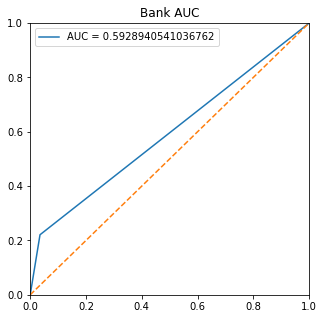

In [16]:
# 繪製 ROC
plt.figure(figsize=[5,5])
plt.title('Bank AUC')
plt.plot(b_fpr, b_tpr, label = 'AUC = {}'.format(b_auc))
plt.plot([0, 1], linestyle = '--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()

In [19]:
# 以機率為主的 ROC, AUC
bank_predpro_trans = bank_predpro[:,1] # 先將機率資料輸出

In [28]:
bpro_fpr, bpro_tpr, bpro_threshold = roc_curve(y_test, bank_predpro_trans)
bpro_auc = auc(bpro_fpr, bpro_tpr)
bpro_auc

0.7622860916680996

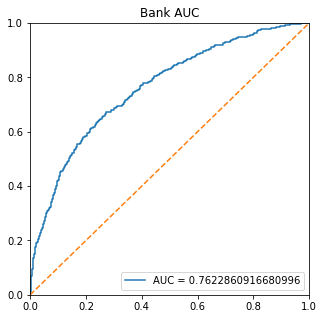

In [29]:
# 繪製機率為主 ROC
plt.figure(figsize=[5,5])
plt.title('Bank AUC')
plt.plot(bpro_fpr, bpro_tpr, label = 'AUC = {}'.format(bpro_auc))
plt.plot([0, 1], linestyle = '--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()

In [ ]:
# .replace用法說明
# dfb['Exited'] = dfb['Exited'].replace({1:'y', 0:'n'}) # 將目標變數轉為類別資料，以利後續分類模型運作

In [31]:
# np.argmax() 用法說明：輸出內容中，數值最大的指數
# print(bank_predpro) 
# bank_predpro.argmax(axis = 1)

[[0.78082059 0.21917941]
 [0.72417271 0.27582729]
 [0.84493641 0.15506359]
 ...
 [0.75964611 0.24035389]
 [0.94249438 0.05750562]
 [0.49930239 0.50069761]]


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [132]:
a = [1,2,3]

In [134]:
a[1]

2

# 物件導向設計-FuncML

In [319]:
class FuncML:
    
    def dataload(self, data):   # 資料基本摘要
        self.data = data
        print('DataColunms\n', self.data.columns)
        print('\nCataLabel\n', self.data.select_dtypes(include = 'object').describe().T)
        print('\nNumericLabel\n', self.data.select_dtypes(include = 'number').describe().T)
        return self.data
        
    def dataprocess(self, xlabel, ylabel, ST = None):       # 資料處理
        self.X = self.data.iloc[:, xlabel[0] : xlabel[1]]   # 劃分特徵變數 
        self.X = pd.get_dummies(self.X)                     # 將類別變數轉為 OHE     
        self.y = self.data.iloc[:, ylabel]                  # 目標變數 
        
        if ST == True:                                      # 是否需要進行資料標準化
            st = StandardScaler()
            self.X = pd.DataFrame(st.fit_transform(self.X), columns=self.X.columns)
        
        print('Process OK')
        
    def datasplit(self, seed, random = None):               # 資料切分
        self.__X_train, self.__X_test, self.__y_train, self.__y_test = train_test_split(self.X, 
                                                                                self.y, 
                                                                                test_size = seed, 
                                                                                random_state = random,
                                                                                stratify = self.y)
        print('Split OK')
        
        
    def Model(self, ModelSelect, **kwag):                           # 建立模型
        
        ''' ModelSelect：                                           # 三種模型選擇
        lr：LogitRegress
        svm：KNN
        rf：RandomForest
        '''
        
        ModelDict = {'lr' : LogisticRegression,
                     'svm' : SVC, 
                     'rf' : RandomForestClassifier}
        
        self.mldelclf = ModelDict[ModelSelect](**kwag)
        self.mldelclf.fit(self.__X_train, self.__y_train)
        
        print('ModelTrain OK')
        
    def ModelPred(self):                                           # 模型預測與績效指標
        self.mldpred = self.mldelclf.predict(self.__X_test)
        
        self.ACC = accuracy_score(self.__y_test,  self.mldpred)
        self.F1 = f1_score(self.__y_test,  self.mldpred, average='macro')
        self.Recall = recall_score(self.__y_test,  self.mldpred, average='macro')
        self.Precision = precision_score(self.__y_test,  self.mldpred, average='macro')
        
        return self.ACC, self.F1, self.Recall, self.Precision
    

In [320]:
test = FuncML()

In [321]:
test.dataload(dfb)

DataColunms
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

CataLabel
            count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

NumericLabel
                    count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [322]:
test.dataprocess(xlabel=[0,9],ylabel=10, ST = True)

Process OK


In [323]:
test.datasplit(seed=0.3)

Split OK


In [324]:
test.Model(ModelSelect='rf', n_estimators=100)

ModelTrain OK


In [327]:
test.ModelPred()

(0.864, 0.7582816192919705, 0.7276339523963831, 0.816156426175694)

In [328]:
test.mldpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [196]:
ss = {'lr':LogisticRegression(),
      'svm':SVC(),
      'rf':RandomForestClassifier()}

In [287]:
s = SVC()

In [216]:
sss(n_estimators = 300)n_estimators=100

TypeError: 'RandomForestClassifier' object is not callable

In [ ]:
################# 其它 ##############################

In [ ]:
重要參數說明：

Init signature:
LogisticRegression(
    penalty='l2',            # 懲罰項：分為'l1', 'l2'
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,       # 針對不衡資料權重調整，因應型一、型二誤差(trade-off)
    random_state=None,
    solver='lbfgs',          # loss-function 不同方法，可針對大、小樣本有不同參數
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,             # 多核心運作參數：-1 為全開核心運作
    l1_ratio=None,
)

penalty：懲罰項，str類型，可選參數為l1和l2，默認為l2。用於指定懲罰項中使用的規範。newton-cg、sag和lbfgs求解演算法只支援L2規範。L1G規範假設的是模型的參數滿足拉普拉斯分佈，L2假設的模型參數滿足高斯分佈，所謂的範式就是加上對參數的約束，使得模型更不會過擬合(overfit)，但是如果要說是不是加了約束就會好，這個沒有人能回答，只能說，加約束的情況下，理論上應該可以獲得泛化能力更強的結果。

class_weight：用於標示分類模型中各種類型的權重，可以是一個字典或者’balanced’字串，預設為不輸入，也就是不考慮權重，即為None。如果選擇輸入的話，可以選擇balanced讓類庫自己計算類型權重，或者自己輸入各個類型的權重。舉個例子，比如對於0,1的二元模型，我們可以定義class_weight={0:0.9,1:0.1}，這樣類型0的權重為90%，而類型1的權重為10%。如果class_weight選擇balanced，那麼類庫會根據訓練樣本量來計算權重。某種類型樣本量越多，則權重越低，樣本量越少，則權重越高。當class_weight為balanced時，類權重計算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples為樣本數，n_classes為類別數量，np.bincount(y)會輸出每個類的樣本數，例如y=[1,0,0,1,1],則np.bincount(y)=[2,3]。
那麼class_weight有什麼作用呢？

n_jobs：並行數。int類型，默認為1。1的時候，用CPU的一個內核運行程式，2的時候，用CPU的2個內核運行程式。為-1的時候，用所有CPU的內核運行程式。

In [ ]:
# 建立模型
lrclf = LogisticRegression()

In [165]:
S = SVC()

In [166]:
S

SVC()

In [ ]:
train_test_split 函數
簡單用法如下：
X_train,X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.4, random_state=0,stratify=y_train)
train_data：所要劃分的樣本特徵集
train_target：所要劃分的樣本結果
test_size：樣本佔比，如果是整數的話就是樣本的數量
random_state：是隨機數的種子。
•	隨機數種子：其實就是該組隨機數的編號，在需要重複試驗的時候，保證得到一組一樣的隨機數。比如你每次都填1，其他參數一樣的情況下你得到的隨機數組是一樣的。但填0或不填，每次都會不一樣。
stratify是為了保持split前類的分布。比如有100個數據，80個屬於A類，20個屬於B類。如果train_test_split(… test_size=0.25, stratify = y_all), 那麼split之後數據如下：
training: 75個數據，其中60個屬於A類，15個屬於B類。
testing: 25個數據，其中20個屬於A類，5個屬於B類。
